Install PyTorch

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision

Import the required packages

What is PyTorch?
It’s a Python based scientific computing package targeted at two sets of audiences:

A replacement for NumPy to use the power of GPUs
a deep learning research platform that provides maximum flexibility and speed

In [0]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

Make plots grayscale and display inline. Fix random seed.

In [0]:
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(seed=485)

Create a custom plot fn for matrix data. pyplot's built in "matshow" will not let us tile multiple images.

In [0]:
def plot_image(image):
    nr, nc = image.size() 
    extent = [-0.5, nc-0.5, nr-0.5, -0.5]
    plt.imshow(image.numpy(), extent=extent, origin='upper', interpolation='nearest') 

Download MNIST data or load it if already downloaded

In [6]:
mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True) # train data only

Processing...
Done!


Check the data shape

In [7]:
print("Data shape: {}".format(mnist_train.train_data.size()))
print("Labels shape: {}".format(mnist_train.train_labels.size()))

Data shape: torch.Size([60000, 28, 28])
Labels shape: torch.Size([60000])


The dataset is ordered (starting with examples labeled '0', ending with examples labeled '9'). To generate train examples, use 60,000 random indices into the dataset.

In [0]:
indices = torch.randperm(60000)
trainimages = mnist_train.train_data[indices]
trainlabels = mnist_train.train_labels[indices]

Plot the first image

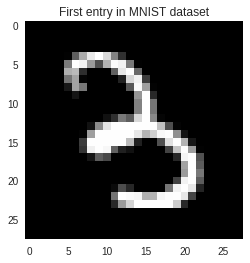

In [9]:
plt.figure()
ax = plt.subplot(111)
ax.grid(False)
plot_image(trainimages[0])
plt.title("First entry in MNIST dataset")
plt.show()

Mean of all images in training set

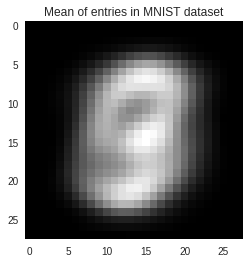

In [10]:
mean = torch.mean(trainimages.float(), dim=0)
plt.figure()
ax = plt.subplot(111)
ax.grid(False)
plot_image(mean)
plt.title("Mean of entries in MNIST dataset")
plt.show()

Show pixels that are zero for all images in training set as black, pixels that are nonzero for at least one image as white. 

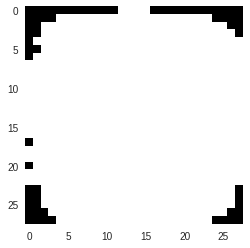

In [11]:
nonzero = torch.gt(torch.sum(trainimages.float(), dim=0), 0.0)
plt.figure()
ax = plt.subplot(111)
ax.grid(False)
plot_image(nonzero)
plt.show()


Define a function for displaying a stack of images.
imgstack is a list of mxn images 

In [0]:
def montage(imgstack):
    plt.figure()
    width = int(np.ceil(np.sqrt(len(imgstack))))
    height = int(np.floor(np.sqrt(len(imgstack))))
    for i in range(0, len(imgstack)):
        ax = plt.subplot(height, width, i+1)
        ax.grid(False)
        plot_image(imgstack[i])
    plt.show()

Show the first 16 train images

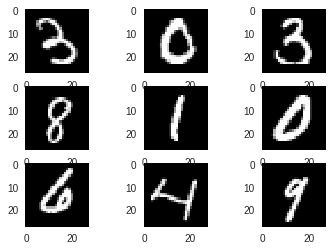

In [13]:
montage(trainimages[0:9])

Display labels of the images above

In [14]:
trainlabels[0:9]


 3
 0
 3
 8
 1
 0
 6
 4
 9
[torch.LongTensor of size 9]

Compute mean of images in each digit class

In [0]:
trainmeans = torch.zeros((10,28,28))
for i in range(10):
    indices = (trainlabels == i).nonzero()[:,0]
    images = trainimages[indices]
    trainmeans[i] = torch.mean(images.float(), dim=0)

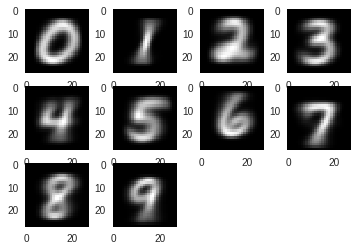

In [17]:
montage([trainmeans[i] for i in range(10)])

Compute distribution over digit classes in training set

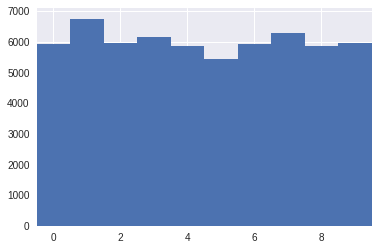

In [18]:
plt.hist(trainlabels.numpy(), bins=[-0.5 + i for i in range(11)])
plt.xlim([-0.5, 9.5])
plt.show()

** Compute the pixelwise standard deviation of the images in each digit class**

In [0]:
trainstds = torch.zeros((10,28,28))
for i in range(10):
    indices = (trainlabels == i).nonzero()[:,0]
    images = trainimages[indices]
    trainstds[i] = torch.std(images.float(), dim=0)

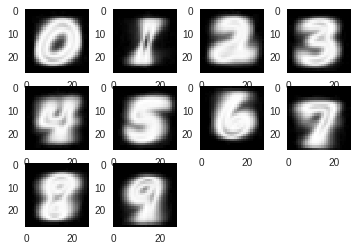

In [22]:
montage([trainstds[i] for i in range(10)])

**Explanation:**

The outer black is because the value in this area of all sample images are nearly all identical: zero.  
The gray and white in the middle is the variance of the handwritten among different people.

The inner black is because this area is filled in all samples (all 10 digits). Therefore the standard deviation becomes small.